In [1]:
#from google.colab import files
#uploaded = files.upload()
#%ls

# Import libraries 
Do not use any other Python library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [3]:
def load_logistic_regression_data():
    test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
    test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
    train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
    train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
    return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [4]:
def sigmoid(input):
    
    output = 1 / ( 1 + np.exp(-input))

  # dummy assignment until the function is filled in
  #output = np.zeros(len(input))
    return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [5]:
def predict_logistic_regression(inputs, weights):
    

   # dummy assignment until the function is filled in
    predicted_probabilities = np.zeros((inputs.shape[0],2))
    
    predicted_probabilities[:,0] = 1- sigmoid (inputs @ weights)
    predicted_probabilities[:,1] = sigmoid (inputs @ weights)
    
    return predicted_probabilities

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [6]:
def eval_logistic_regression(inputs, weights, labels):
    # dummy assignment until the function is filled in
    neg_log_prob = 0
    accuracy = 0
    count = 0
    predicted_probabilities = predict_logistic_regression(inputs, weights)
   
    for i in range(len(inputs)):
        neg_log_prob += -(labels[i]* np.log(sigmoid(inputs@weights)[i])+(1-labels[i])* np.log (1-sigmoid(inputs@weights)[i]))
        if labels[i] == 1 and predicted_probabilities[i,1]>= 0.5 :
            count += 1
        if labels[i] == 0 and predicted_probabilities[i,0]>= 0.5:
            count += 1
    
    accuracy = count/len(inputs) * 100
            
  
  
    return neg_log_prob, accuracy

# Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.01,0.01]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [7]:
def initialize_weights(n_weights):
    random_weights = np.zeros(n_weights)
    for i in range(n_weights):
        random_weights[i] = np.random.choice([-0.01,0.01])
    

  # dummy assignment until the function is filled in
  
    return random_weights

# Function train_logistic_regression_gradient

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement gradient descent to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., gradient updates) reaches max_iters=10000.  Use learning_rate=0.0001. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)
*   **learning_rate**: learning rate that that multiplies the gradient in a weight update (default=0.0001)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [8]:
def train_logistic_regression_gradient(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1, learning_rate=0.0001):

  # dummy assignment until the function is filled in
    #weights = np.zeros(train_inputs.shape[1])
    n_weights = train_inputs.shape[1]
    weights = initialize_weights(n_weights)
    n_iters = 0
    

    #progress_bar_GD = tqdm(desc='Processing...')
    while n_iters <= max_iters:
        predicted_prob = predict_logistic_regression(train_inputs, weights)[:,1]
        gradient = np.transpose(train_inputs) @(predicted_prob-train_labels) + lambda_hyperparam * weights
        weights = weights - learning_rate * gradient 
        gradient_norm = np.linalg.norm(gradient,2)
        if gradient_norm <= gradient_norm_threshold:
            break
        n_iters += 1
        #progress_bar_GD.update(1)
        
    #progress_bar_GD.close()
    return weights, n_iters

# Function train_logistic_regression_newton

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., weight updates) reaches max_iters=10000. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [9]:
def train_logistic_regression_newton(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1):
    n_weights = train_inputs.shape[1]
    weights = initialize_weights(n_weights)
    n_iters = 0
    
    
    
    #progress_bar_newton = tqdm(desc='Processing...')
    while n_iters <= max_iters :
        predicted_prob = predict_logistic_regression(train_inputs, weights)
        R = np.zeros((predicted_prob.shape[0], predicted_prob.shape[0]))
        R = np.diag(predicted_prob[:,0] * predicted_prob [:,1])

        Hessian = np.transpose(train_inputs) @ R @ train_inputs + lambda_hyperparam * np.identity(train_inputs.shape[1])
        
        gradient = np.transpose(train_inputs) @ (predicted_prob[:,1]-train_labels) + lambda_hyperparam* weights
        H_inv = np.linalg.inv(Hessian)
        weights = weights - H_inv @ gradient 
        gradient_norm = np.linalg.norm(gradient,2)
        
        if gradient_norm <= gradient_norm_threshold:
            break
        n_iters += 1
        #progress_bar_newton.update(1)
    #progress_bar_newton.close() 
    # dummy assignment until the function is filled in
    #weights = np.zeros(train_inputs.shape[1])
    #n_iters = 0
    return weights, n_iters

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **algorithm**: string in {'newton','gradient descent'}

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [10]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels, algorithm):
  
  # dummy assignments until the function is filled in
    best_hyperparam = 0
    best_neg_log_prob = 0
    neg_log_probabilities = np.zeros(len(hyperparameters))
    
    p=int(len(inputs)/k_folds)  #number of data points in each validation data set
    hyperparameters = np.array(hyperparameters)
    kk=range(1,k_folds+1)
    
    neg_log_probabilitiesK = np.zeros(len(kk))
    neg_log_probabilities = np.zeros(len(hyperparameters))
    
    for k in range (len(hyperparameters)):
        
        for i in kk:
            
            a = (i-1)*p
            b = i*p
            valid = inputs[a:b]
            valid_label = labels[a:b]
            train = np.delete(inputs,slice(a,b),0)
            label = np.delete(labels,slice(a,b))
    
            if algorithm == 'newton':
                weights, n_iters = train_logistic_regression_newton(train, label, hyperparameters[k], max_iters=10000, gradient_norm_threshold=0.1)
            
            if algorithm == 'gradient descent':
                weights, n_iters = train_logistic_regression_gradient(train, label, hyperparameters[k], max_iters=10000, gradient_norm_threshold=0.1, learning_rate=0.0001)
            neg_log_prob, accuracy = eval_logistic_regression(valid, weights, valid_label)
            neg_log_probabilitiesK[i-1] = neg_log_prob
        neg_log_probabilities[k] = sum(neg_log_probabilitiesK)/k_folds
        
    best_hyperparam_index = np.argsort(neg_log_probabilities)[:1]
    best_hyperparam = hyperparameters [best_hyperparam_index]
    best_neg_log_prob = neg_log_probabilities[best_hyperparam_index] 
    
    
    return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **algorithm**: string in {'newton','gradient descent'}

In [11]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,algorithm):
    plt.plot(hyperparams,neg_log_probabilities)
    plt.ylabel('negative log probability')
    plt.xlabel('lambda')
    plt.title(algorithm)
    plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

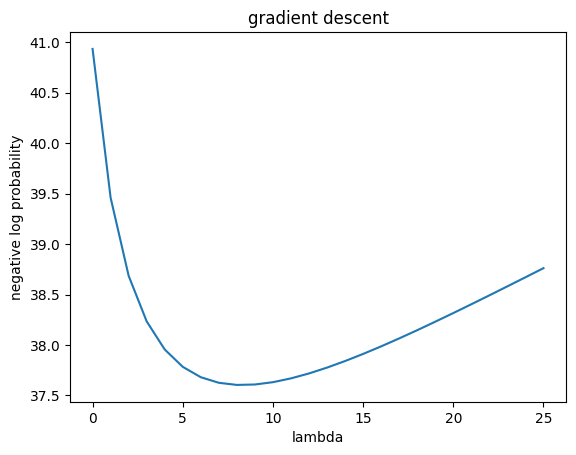

Gradient descent best lambda: [8]
Gradient descent best cross validation negative log probability: [37.60464626]
Gradient descent test accuracy: 87.27272727272727
Gradient descent test negative log probability: 33.285492937181964
Gradient descent # of iterations: 3112


In [12]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

###############################################
# logistic regression based on gradient descent
###############################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'gradient descent')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'gradient descent')
print('Gradient descent best lambda: ' + str(best_lambda))
print('Gradient descent best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_gradient(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Gradient descent test accuracy: ' + str(accuracy))
print('Gradient descent test negative log probability: ' + str(neg_log_prob))
print('Gradient descent # of iterations: ' + str(n_iters))



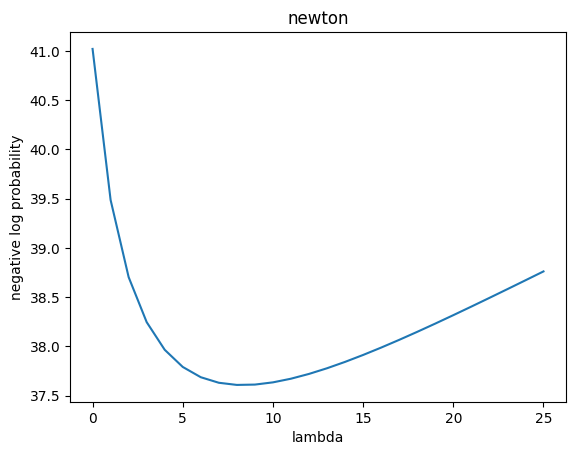

Newton best lambda: [8]
Newton best cross validation negative log probability: [37.60806443]
Newton test accuracy: 87.27272727272727
Newton test negative log probability: 33.29203076735771
Newton # of iterations: 4


In [13]:

#################################################
# logistic regression based on Newton's algorithm
#################################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'newton')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'newton')
print('Newton best lambda: ' + str(best_lambda))
print('Newton best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_newton(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Newton test accuracy: ' + str(accuracy))
print('Newton test negative log probability: ' + str(neg_log_prob))
print('Newton # of iterations: ' + str(n_iters))

# Discussion

## Question 1: 
Compare the results for gradient descent and Newton's algorithm. Discuss the scalability of each algorithm (i.e., time and space complexity). For what type of dataset would you use gradient descent versus Newton's algorithm?

The results of Newton's method and gradient descent are almost the same, excepts newton require only 4 iterations for convergence and a few seconds, but gradient descent requires more than 3000 iterations and about one minute to get the same result.

### 1. Time complexity: 

The time complexity is determined by the number of iterations and how much work should be done in one iteration. In the following explanation, N, M, and k are defined as follows:
N = number of samples
M = number of features
k = number of iterations
#### 1.1. Gradient descent:
In gradient descent, no operation is computationally too heavy, and it's a fairly simple model. However, the search direction that GD chooses is not optimized, and convergence is slow. First, we use a very small (and constant) learning rate, which takes a lot of time to converge despite helping not to overshoot. Second, the search direction gets us far away from the minima, so the next gradient is perpendicular to the previous one. This causes a zig-zag movement to the minimum. Eventually, it gets to the minimum but after many steps, which can be time-consuming.

In GD, in each iteration, there is a matrix-vector multiplication to be computed:
in the line: gradient = np.transpose(train_inputs) @ (predicted_prob - train_labels) + lambda_hyperparam * weights, we have (M+1) pair of vector-vector multiplication which includes N multiplications and N-1 additions. Suppose that the cost for multiplication and addition are the same so (M+1) * (2N-1) floating point operations are needed. Taking the dominant term, the cost per iteration for gradient descent is: O(M.N)
Hence, gradient descent's time complexity is: O(k.M.N)


#### 1.2. Newtion: 
Newton, on the other hand, is doing heavy operations. It is computing the Hessian matrix at each iteration on top of the gradient (which we had for GD). Computing the Hessian involves building the matrix R at first and then performing matrix multiplication. Additionally, we need to compute the "inverse" of the Hessian to update the weights, which has a high computational cost. However, since the search direction for Newton's method is more optimized than GD, we converge only in a few steps. That way, all in all, Newton's method takes less time to process.

Setting aside the complexity to compute the gradient, the complexity to compute the Hessian involves 3 matrices to be multiplied to each other. Their sizes are (M+1, N), (N, N), (N, M+1). Hence the computational cost is O(N.M^2 + M.N^2). (Because to compute one element, we need (2N-1) floating point operations. There are M+1 rows and N columns. The same goes for the second matrix multiplication). Keeping only the dominant terms, O(N.M^2 + M.N^2) floating point operations are needed. The total time complexity will be: O(k.(M.N^2 + N.M^2)).

Depending on the range of observations (N) and features (M) and the number of iterations, Newton could be faster or gradient descent. In this case, Newton's methods take very few steps (as little as 4), and overall it takes much less time for it to converge. However, if the number of features and samples is too large, it is very costly for Newton to converge.



### 2. Space complexity

In terms of space complexity, Newton's method needs to compute the inverse of the Hessian in each iteration. The Hessian matrix is an (M+1) by (M+1) matrix (M being the number of features/columns), hence there is something of order O(M^2) to be computed and stored in the memory every time. If we are going to have a dataset with millions of features, then it might not even fit in the memory, which is undesirable. Gradient Descent, on the other hand, only needs to store the gradient and the weights, which is O(M) (Newton needs to store these on top of the Hessian). Therefore, Newton's method has far more space complexity than GD.


## Question 2: 

Logistic regression finds a linear separator where as k-Nearest Neighbours (in Assignment 1) finds a non-linear separator. Compare the expressivity of the separators. Discuss under what circumstances each type of separator is expected to perform best. What could explain the results obtained with KNN in comparison to the results obtained with logistic regression?

As seen on Page 8, Lecture 6 notes, the decision boundry for logistic regreseeion is a line(or a hyperplane) that separates the two classes from each other. 
$\sigma(w_k^T \overline x) = 0.5$ ===> $1/(1+exp(w_k^T \overline x))$=1/2 ===> $w_k^T \overline x = 0$ : Linear Separator
Based on this, logistic regression is an appropriate classifier to model a linear relationship between inputs and the output.


KNN finds a non-linear sepratator to model the data. It has a high flexibility of modeling complex relationships between the inputs and the outputs. It is also not restricted to binary classes, and can model multiclass classification tasks and the decision boundry consists of the boundry around a group of points with the same class. 


Being able to model complex and non-linear relationship between input and outputs, give KNN method a higher expressivity than logistic regression.

Logistic regression can perform best when there is a linear relationship between inputs and outputs and there are only two classes to be determined. It doesn't need a lot of points to perform and is computationally efficient. So it works well with small data sets. On the other hand, KNN is computationally expensive because it's computing the distance between data points,  so it needs a larger data set. But it doesn't need care about the relationship between output and inputs and that's a big advantage.

Comparing the results between KNN and Logistic regression:

KNN, test accuracy: 0.7636363636363637

Logistic regression ,Gradient descent test accuracy: 87.27272727272727

One of the reasons why we have a higher test accuracy for logistic regression than KNN despite KNN's higher expressivity, is that KNN is more prone to overfitting than the logistic regression, so it can perform worse when it is exposed to unseen data (test data). Another reason can be adding a regularization term to the logistic regression, which helps in not overfitting the data.

Overall, a model with a linear separator performs best when the data is linearly separable, and when it's not linearly separable, a model like KNN can be more precise. However, as said before, KNN is computationally expensive and can be inefficient for large data sets. On the other hand logistic regression is computationally efficient and can lead to a sufficiently high accuracy for large datasets. It may not be the best, but as there is a trade-off between accuracy and complexity, we should choose that which one is more important to us. Considering all of the factors set and the nature of the data, we can choose which methods works best for the problem in hand.


## Question 3:

Logistic regression finds a linear separator, so a good practice to see if the training data is linearly separable or not is to train them using logistic regression and see how well the model has done.
If the training data is linearly separable, we must  only see class 1 data points (label =1, blue) with $\sigma >= 0.5 $ and class 0 data points (label=0, red) with $\sigma <=0 $. This means that we should be able to obtain an accuracy of 100% for the trainig data.(Or at least very close to 100%).

We are going to use the weights and the hyperparameters derived in the previous sections. We do this because these values have given us the highest accuracies and the weights computed with these parameters are the best that logistic regression can do. If we don't get 100% accuracy, it means that the training data was not linearly separable.

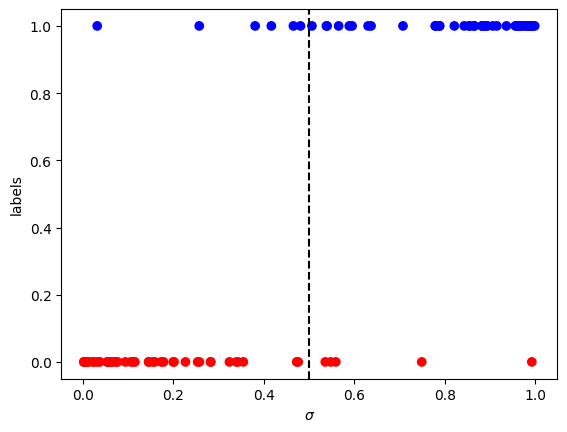

In [14]:
prob_train = predict_logistic_regression(train_inputs, weights)

x = []
y = []
colors = []

# Generate random data
for i in range(100):
    x.append(prob_train[i,1])
    y.append(train_labels[i])
    colors.append('red' if train_labels[i] == 0 else 'blue')

# Plot the data
plt.scatter(x, y, c=colors)
plt.axvline(x=0.5, color='black', linestyle='--')
plt.xlabel('$\sigma$')
plt.ylabel('labels')
plt.show()

The dashed line indicates $\sigma = 0$. If the training data was linearly separable, using the logistic regression classifier we should've only seen blue points on the right hand side of the dashed line and the red points only to the left of the dashed line. This graph shows that the training data in not linearly separable.

Another way of showing this is to see where are the blue points(label=1) and red points(label=0) are located in terms of probability.

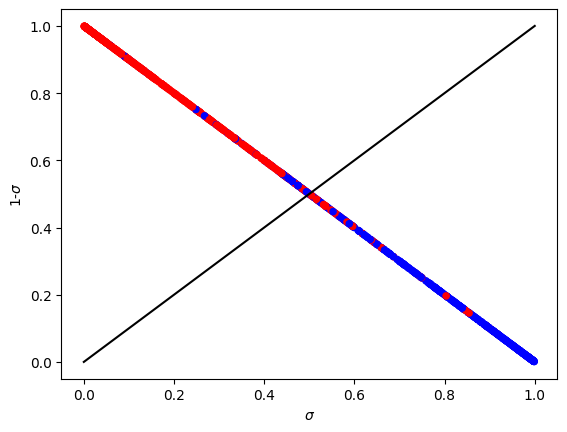

In [15]:

x = []
y = []
colors = []

for i in range(len(train_inputs)):
    x.append(prob_train[i,1])
    y.append(prob_train[i,0])
    colors.append('blue' if train_labels[i]==1 else 'red')

plt.scatter(x, y, c=colors,s=20)
xx = np.linspace(0, 1, 10)
yy = xx

plt.plot(xx, yy, 'k-', label='Separating line')
plt.xlabel('$\sigma$')
plt.ylabel('1-$\sigma$')
plt.show()

If the training data were linearly separable, after training using logistic regression, we should have seen blue points in the right hand side of the black line and red only left hand side. However as it is visible from the graph, there are some red points among blue ones and there are some blue points among red points. This clearly shows that the training data was not linearly separable.
We can also see that the accuracy of training data is not 100%:

In [16]:
neg_log_prob_train, accuracy_train = eval_logistic_regression(train_inputs, weights, train_labels)
print('train accuracy: ' + str(accuracy_train))

train accuracy: 87.8
